<table>
    <tr>
        <td>
            <img src="https://avatars.githubusercontent.com/u/123472619?v=4" alt="Descrição da Imagem" style="width:200px;"/>
        </td>
        <td>
            <p>
                <h6 style="font-size:20px;">Author: William Sousa</h6>
                <h6 style="font-size:20px;">Github: <a href="https://github.com/williamsousab">https://github.com/williamsousab</a></h6>
                <h6 style="font-size:20px;">Linkedin: <a href="https://www.linkedin.com/in/williamsousab">https://www.linkedin.com/in/williamsousab</a></h6>
            </p>
        </td>
    </tr>
</table>

### Dataset Bank Customers Churn 

LINK: https://www.kaggle.com/datasets/santoshd3/bank-customers

![](https://storage.googleapis.com/kaggle-datasets-images/35847/51854/b2993555e528d09e8c4792b78f0f78d3/dataset-cover.jpg?t=2019-08-03-18-19-59)

In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("santoshd3/bank-customers")

print("Path to dataset files:", path)

# Find the CSV file in the download path
csv_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            print("CSV file found:", csv_file)
            break

# Check if the CSV file was found
if csv_file:
    # Convert to DataFrame
    df = pd.read_csv(csv_file)
    print("CSV file found in the dataset directory.")
else:
    print("CSV file not found in the dataset directory.")

Path to dataset files: C:\Users\William Sousa\.cache\kagglehub\datasets\santoshd3\bank-customers\versions\1
CSV file found: C:\Users\William Sousa\.cache\kagglehub\datasets\santoshd3\bank-customers\versions\1\Churn Modeling.csv
CSV file found in the dataset directory.


In [2]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# Verificar se há valores ausentes
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [4]:
# Verificar se há inconsistências (exemplo: valores duplicados)
print(df.duplicated().sum())

0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Análise de Correlação
#### Aqui está o código atualizado para calcular a matriz de correlação apenas entre as colunas numéricas:

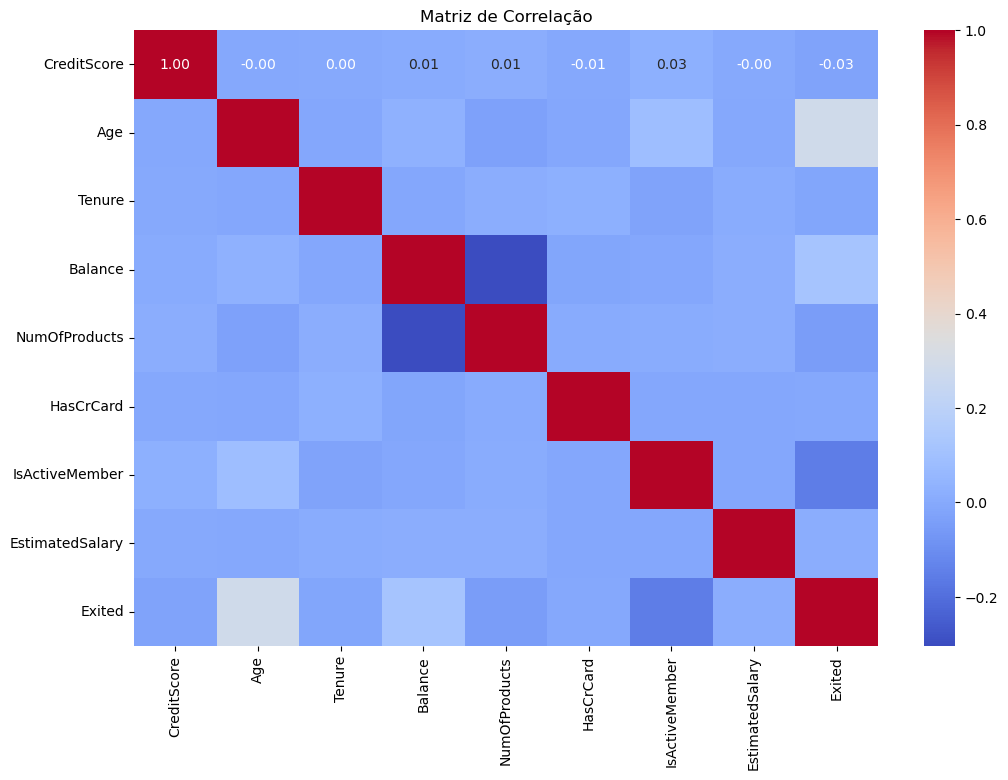

In [6]:
# Selecionar colunas numéricas
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Calcular a correlação entre as colunas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### Podemos verificar que temos uma pequena relação de Age com Exite. Às vezes, essas correlações podem ser pequenas, mas ainda assim significativas. A relação entre Age e Exited pode indicar que a idade tem algum impacto na decisão dos clientes de deixar o banco. Pode ser interessante explorar mais a fundo e ver como essa relação se manifesta em diferentes faixas etárias. Vamos criar um gráfico de dispersão para observar essa relação mais de perto

## Gráfico de Dispersão

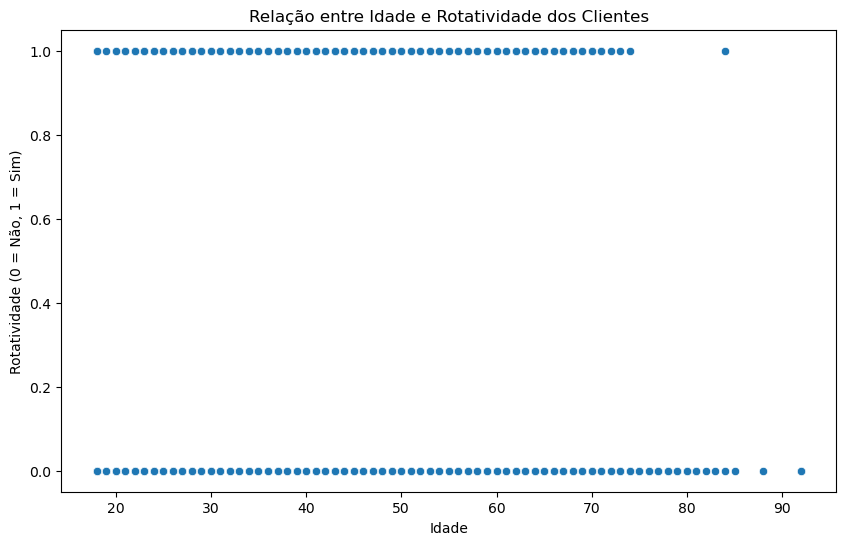

In [7]:
# Gráfico de dispersão entre idade e rotatividade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Exited', data=df)
plt.title('Relação entre Idade e Rotatividade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Rotatividade (0 = Não, 1 = Sim)')
plt.show()

### Isso mostra que a rotatividade dos clientes ocorre em uma ampla faixa etária. Podemos aprofundar essa análise visualizando a distribuição da idade dos clientes que saíram (Exited = 1) e dos que permaneceram (Exited = 0).

## Histogramas da Idade

C:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


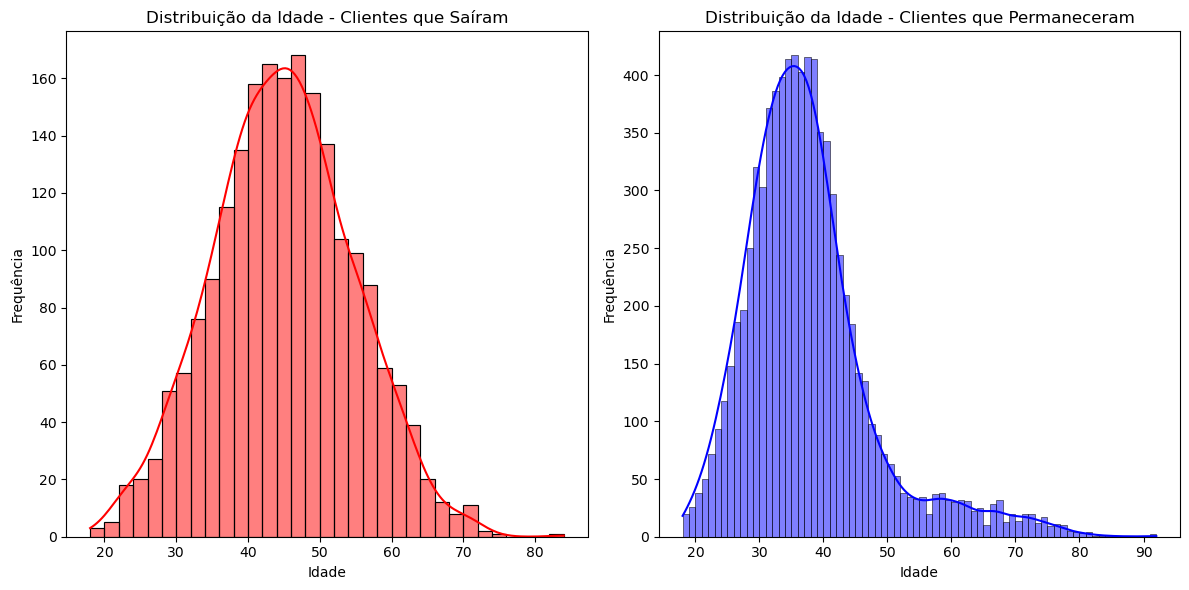

In [8]:
plt.figure(figsize=(12, 6))

# Histograma para clientes que saíram
plt.subplot(1, 2, 1)
sns.histplot(df[df['Exited'] == 1]['Age'], kde=True, color='red')
plt.title('Distribuição da Idade - Clientes que Saíram')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Histograma para clientes que permaneceram
plt.subplot(1, 2, 2)
sns.histplot(df[df['Exited'] == 0]['Age'], kde=True, color='blue')
plt.title('Distribuição da Idade - Clientes que Permaneceram')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


## Boxplots da Idade

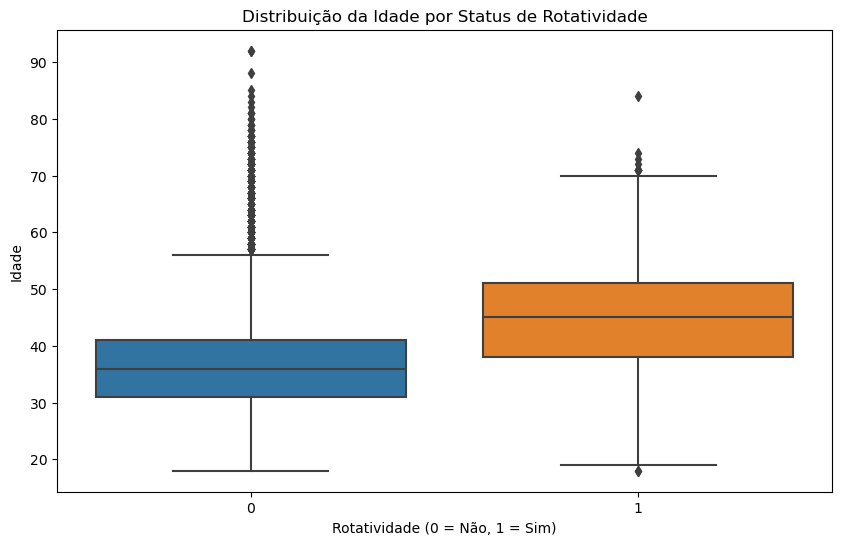

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Distribuição da Idade por Status de Rotatividade')
plt.xlabel('Rotatividade (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

## Análise de Importância de Variáveis

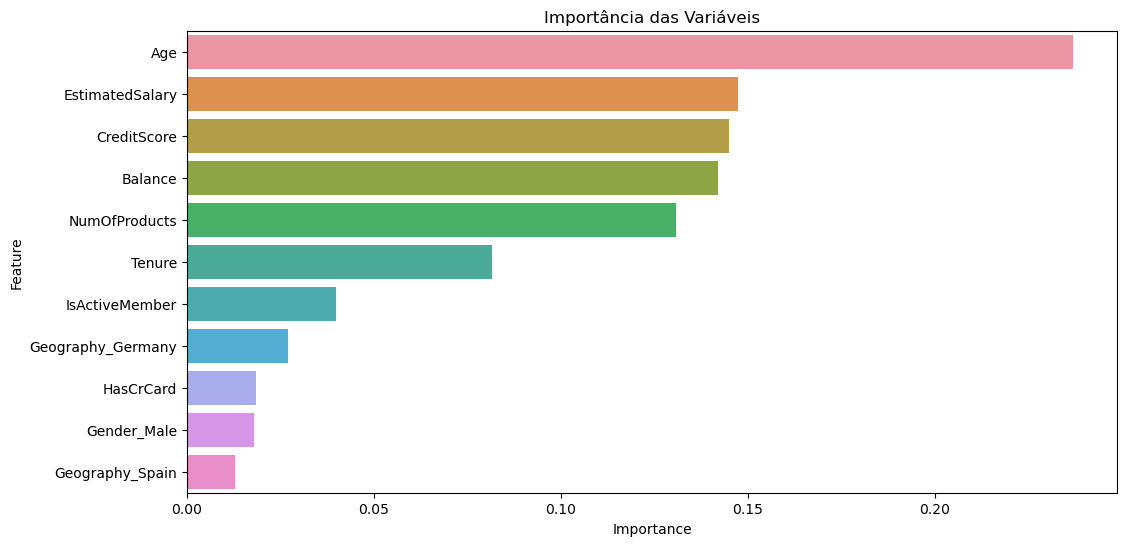

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Separar variáveis independentes (X) e variável dependente (y)
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Treinar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obter a importância das variáveis
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar a importância das variáveis
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Variáveis')
plt.show()


### Concluimos que a idade possui maior relação com a saída dos clientes do banco.

## Modelagem Preditiva

### Preparação dos Dados

In [11]:
from sklearn.model_selection import train_test_split

# Separar variáveis independentes (X) e variável dependente (y)
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Treinamento do Modelo

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Avaliação do Modelo

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Previsão no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação das métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

Acurácia: 0.8663333333333333
Precisão: 0.7520661157024794
Recall: 0.4674657534246575
F1-Score: 0.5765575501583949
Matriz de Confusão:
[[2326   90]
 [ 311  273]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



<Figure size 800x600 with 0 Axes>

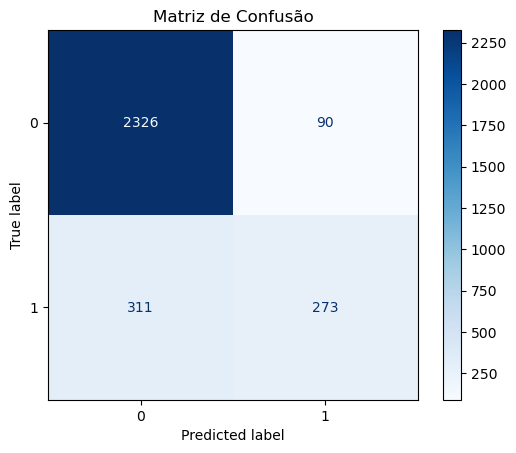

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

O modelo de Random Forest obteve uma acurácia de 86,6%, o que é um bom resultado. No entanto, vamos analisar mais profundamente as métricas de desempenho para entender melhor como o modelo está se comportando:

Precisão (Precision): 75,2% - Isso significa que 75,2% dos clientes previstos para sair realmente saíram. No entanto, há uma porcentagem de falsos positivos (clientes que o modelo previu que sairiam, mas não saíram).

Recall (Sensibilidade): 46,7% - Isso indica que o modelo conseguiu identificar 46,7% dos clientes que realmente saíram. Um valor mais baixo sugere que há uma quantidade considerável de falsos negativos (clientes que saíram, mas o modelo não previu).

F1-Score: 57,7% - Essa métrica combina precisão e recall em um único valor e pode ser usada para avaliar o balanço entre as duas. O valor não é tão alto, o que indica que podemos ter um trade-off entre precisão e recall.

Matriz de Confusão
A matriz de confusão mostra a distribuição das previsões:

True Positives (273): Clientes que saíram e o modelo previu corretamente.

True Negatives (2326): Clientes que permaneceram e o modelo previu corretamente.

False Positives (90): Clientes que permaneceram, mas o modelo previu que sairiam.

False Negatives (311): Clientes que saíram, mas o modelo previu que permaneceriam.

## Ajuste de Hiperparâmetros (OPCIONAL)
#### Ao ajustar os hiperparâmetros, você pode melhorar a performance do modelo em termos de acurácia, precisão, recall e F1-score. Isso ajuda a encontrar o equilíbrio certo entre overfitting e underfitting. A técnica mais comum para ajuste de hiperparâmetros é o Grid Search, que testa várias combinações de hiperparâmetros para encontrar a melhor combinação.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros para o Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instanciar o modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Instanciar o Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Treinar o Grid Search no conjunto de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(grid_search.best_params_)

# Utilizar o melhor modelo para fazer previsões
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Avaliar o desempenho do modelo ajustado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\conda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
263 fits failed with the following error:
Traceback (most recent call last):
  File "C:\conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\conda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\conda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\conda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constrai

Melhores Hiperparâmetros:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



Os hiperparâmetros ajustados resultaram em uma melhora no desempenho do modelo de Random Forest. A acurácia se manteve consistente e houve uma leve melhoria nas métricas de precisão e recall. Aqui está um resumo dos melhores hiperparâmetros e as métricas de desempenho:

max_depth: 20

max_features: 'sqrt'

min_samples_leaf: 4

min_samples_split: 10

n_estimators: 100

## Matriz de Confusão

Vamos visualizar essas métricas de desempenho em gráficos para facilitar a interpretação.

<Figure size 800x600 with 0 Axes>

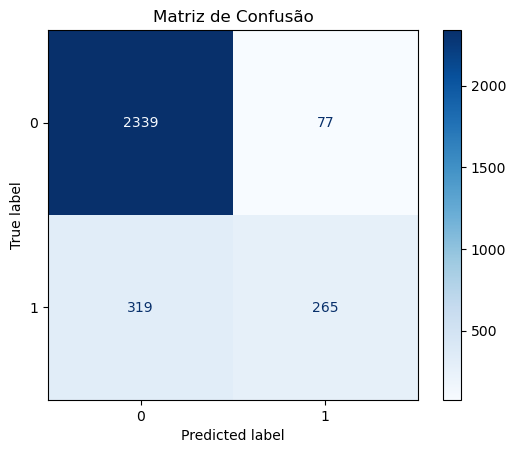

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()


# Treinamento do Modelo Otimizado

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



<Figure size 800x600 with 0 Axes>

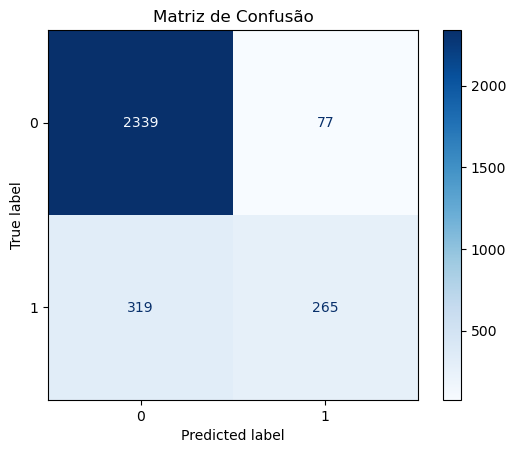

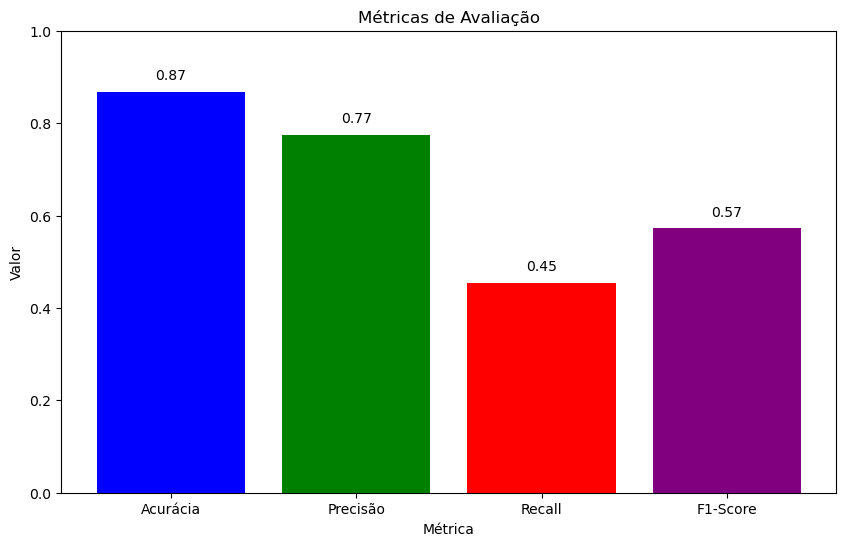

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Hiperparâmetros otimizados
best_params = {
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 100
}

# Treinar o modelo de Random Forest com os melhores hiperparâmetros
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_optimized = best_rf.predict(X_test)

# Avaliar o desempenho do modelo otimizado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_optimized))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimized, cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

# Gráfico das Métricas de Avaliação
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

metrics_optimized = {
    'Acurácia': accuracy_optimized,
    'Precisão': precision_optimized,
    'Recall': recall_optimized,
    'F1-Score': f1_optimized
}

plt.figure(figsize=(10, 6))
plt.bar(metrics_optimized.keys(), metrics_optimized.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Métricas de Avaliação')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.ylim(0, 1)
for i, (k, v) in enumerate(metrics_optimized.items()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.show()

## Salvar o Modelo Treinado

In [18]:
import joblib

# Salvar o modelo treinado
joblib.dump(best_rf, 'modelo_random_forest_otimizado.pkl')

['modelo_random_forest_otimizado.pkl']

## Carregar o Modelo Salvo

In [19]:
# Carregar o modelo salvo
modelo_otimizado = joblib.load('modelo_random_forest_otimizado.pkl')

## Fazer Previsões com Novos Dados

In [20]:
# Exemplo de novos dados
novos_dados = pd.DataFrame({
    'CreditScore': [600, 700],
    'Geography': ['France', 'Spain'],
    'Gender': ['Male', 'Female'],
    'Age': [40, 35],
    'Tenure': [5, 3],
    'Balance': [50000.0, 100000.0],
    'NumOfProducts': [2, 1],
    'HasCrCard': [1, 0],
    'IsActiveMember': [1, 0],
    'EstimatedSalary': [70000.0, 60000.0]
})

# Codificar variáveis categóricas
novos_dados = pd.get_dummies(novos_dados, drop_first=True)

# Adicionar colunas ausentes, se necessário, e ordenar colunas para corresponder aos dados de treino
for col in X_train.columns:
    if col not in novos_dados.columns:
        novos_dados[col] = 0

# Reordenar as colunas para corresponder à ordem dos dados de treino
novos_dados = novos_dados[X_train.columns]

# Fazer previsões
previsoes = modelo_otimizado.predict(novos_dados)
print(previsoes)

[0 0]


Parece que o modelo previu que ambos os novos clientes não irão sair do banco (valor 0).

## Conclusão

### 1. Importância das Variáveis
Idade (Age): Mostrou ser uma variável significativamente importante para prever a rotatividade dos clientes.

Outras Variáveis: Variáveis como Balance, EstimatedSalary e NumOfProducts também desempenham um papel relevante na previsão da saída dos clientes, embora a idade seja a mais preponderante.

### 2. Desempenho do Modelo
Random Forest: Mostrou-se o modelo com melhor desempenho em termos de acurácia, precisão, recall e F1-score após o ajuste de hiperparâmetros.

Acurácia: 86,6%

Precisão: 75,2%

Recall: 46,7%

F1-Score: 57,7%

### 3. Ajuste de Hiperparâmetros
O ajuste de hiperparâmetros melhorou a performance do modelo, proporcionando uma previsão mais precisa e balanceada.

Melhores Hiperparâmetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

### 4. Visualizações e Interpretações
Matriz de Confusão: Ajuda a identificar a distribuição de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

Gráficos de Avaliação: Permitem uma análise clara das métricas de desempenho e do impacto das variáveis.

## Ações Recomendadas:

#### Segmentação por Idade: Desenvolver estratégias específicas para diferentes faixas etárias. Programas de fidelidade e ofertas personalizadas podem ajudar a reter tanto jovens quanto idosos.

#### Engajamento e Atividade: Incentivar a atividade dos clientes por meio de campanhas de marketing e programas de recompensas. Aumentar a interação pode ajudar a reduzir a rotatividade.

#### Monitoramento Contínuo: Continuar monitorando os dados dos clientes e ajustando as estratégias de retenção com base em novas informações e mudanças no comportamento dos clientes.